In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from word2number import w2n
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#Reading the Dataset
df=pd.read_csv("hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
df.experience=df.experience.fillna('Zero')

In [4]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,Zero,8.0,9,50000
1,Zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [5]:
# Apply word_to_num (to convert word to number in experience row)

df.experience=df.experience.apply(w2n.word_to_num)

In [6]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [12]:
dff=df['test_score(out of 10)'].mean()
dff

np.float64(7.857142857142857)

In [13]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(dff)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


In [14]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=2)

In [16]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [23]:
x_pred=reg.predict(x_train)
y_pred=reg.predict(x_test)

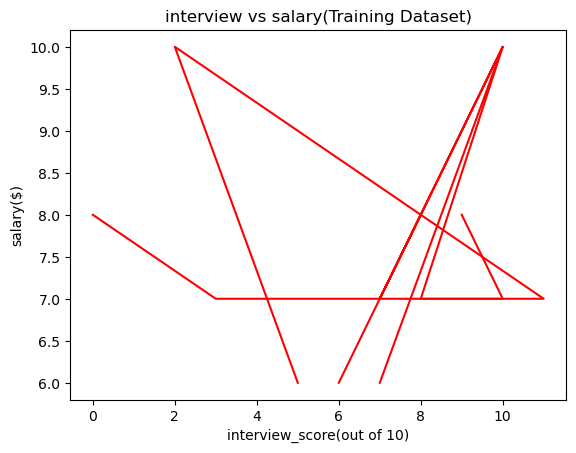

In [26]:
plt.plot(x_train, x_pred.flatten(), color='red')
plt.title('interview vs salary(Training Dataset)')
plt.xlabel('interview_score(out of 10)')
plt.ylabel('salary($)')
plt.show()

In [27]:
print(x_train.shape, y_train.shape)

(5, 3) (5,)


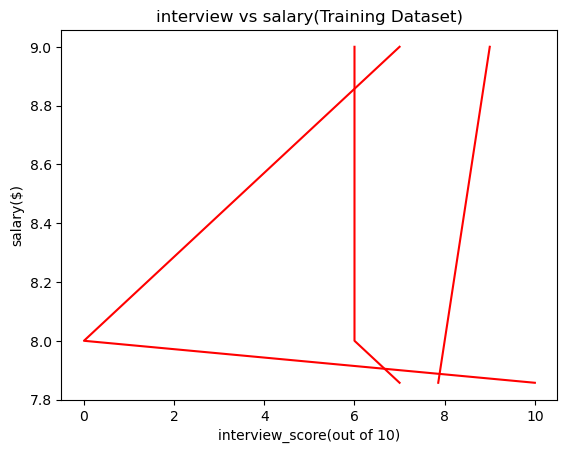

In [29]:
plt.plot(x_test, y_pred.flatten(), color='red')
plt.title('interview vs salary(Training Dataset)')
plt.xlabel('interview_score(out of 10)')
plt.ylabel('salary($)')
plt.show()